In [1]:
%pip install pyodbc  
%pip install python-dotenv

#install openpyxl to overcome Import error of .xlsx file(Telco-churn-second-2000.xlsx)
#%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
environment_variables=dotenv_values('.env')

database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
connection=pyodbc.connect(connection_string)

In [5]:
query="Select * from dbo.LP2_Telco_churn_first_3000"
data=pd.read_sql(query, connection)

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
#get information on first dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
#import second dataset and store in data2

data2 = pd.read_csv(r"C:\Users\lenovo\Desktop\Seth\Personal\Azubi\Career Accelarator prog\LP2\LP2_Telco-churn-last-2000.csv")

In [9]:
#get information on data2

data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [10]:
#check the shape of data 

data.shape

(3000, 21)

In [11]:
#check the shape of data2

data2.shape

(2043, 21)

In [12]:
#combine data and data2 since they are the train dataset
#covert to csv file and store as 'aba.csv'

df=pd.concat([data,data2])
df.to_csv('aba.csv')

In [13]:
#preview concatenated DataFrame

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [14]:

df.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [16]:
#unable to read test data, why?
#possible solution: add (r"file path"), double \\, or forward/
#df2=pd.read_csv(r"C:\Users\lenovo\Desktop\Seth\Personal\Azubi\Career Accelarator prog\LP2\Telco-churn-second-2000.xlsx")

#file_path=r"C:\Users\lenovo\Desktop\Seth\Personal\Azubi\Career Accelarator prog\LP2\Telco-churn-second-2000.xlsx"
#df2=pd.read_excel(file_path)

#file_path="C:\\Users\\lenovo\\Desktop\\Seth\\Personal\\Azubi\\Career Accelarator prog\\LP2\\Telco-churn-second-2000.xlsx"
#df2=pd.read_excel(file_path)

#file_path="C:/Users/lenovo/Desktop/Seth/Personal/Azubi/Career Accelarator prog/LP2/Telco-churn-second-2000.xlsx"
#df2=pd.read_excel(file_path)



In [17]:
#import test dataset (Telco-churn-second-2000.xlsx)

file_path="C:/Users/lenovo/Desktop/Seth/Personal/Azubi/Career Accelarator prog/LP2/Telco-churn-second-2000.xlsx"
df2=pd.read_excel(file_path)

In [18]:
#preview df2(test dataset)

df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [19]:
#check shape of df2

df2.shape

(2000, 20)

Since I observed that the shapes of the two DataFrames were different, I decided to compare the two side-by-side with the code below. This showed that the test dataset(df2) did not have column 'Churn' as df(train dataset)

In [20]:
# Compare the two DataFrames df and df2 side-by-side

# Create custom summary DataFrames for each DataFrame
summary_df = pd.DataFrame({'Column Name': df.columns, 'Data Type': df.dtypes, 'Non-Null Count': df.count()})
summary_df2 = pd.DataFrame({'Column Name': df2.columns, 'Data Type': df2.dtypes, 'Non-Null Count': df2.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_df.set_index('Column Name', inplace=True)
summary_df2.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_df, summary_df2], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           5043      object         2000.0
gender                object           5043      object         2000.0
SeniorCitizen         object           5043       int64         2000.0
Partner               object           5043      object         2000.0
Dependents            object           5043      object         2000.0
tenure                 int64           5043       int64         2000.0
PhoneService          object           5043      object         2000.0
MultipleLines         object           4774      object         2000.0
InternetService       object           5043      object         2000.0
OnlineSecurity        object           4392      object         2000.0
OnlineBackup          object           4392      object         2000.0
Device

In [21]:
df['SeniorCitizen'].unique()

array([False, True], dtype=object)

In [22]:
df2['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

From the above comparison, column 'SeniorCitizen' was an object in df but an integer in df2. Using a .unique() it was observed that df['SeniorCitizen] is a boolean while df2['SeniorCitizen'] is a binary variable. 

df2 had no missing values
df has some missing values which should be investigated

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [24]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

Using the above code to count the missing values in each column in df. The following columns will have to be checked and cleaned if necessary
Churn, TotalCharges, MultipleLines, OnlineSecurity,OnlineBackup, DeviceProtection, TechSupport,StreamingTV, and StreamingMovies   

In [25]:
#check the row with missing column in 'Churn'

column_name = 'Churn'

# Filter rows with missing values in the specified column
rows_with_missing_in_column = df[df[column_name].isnull()]

# Now, rows_with_missing_in_column is a DataFrame containing only the rows with missing values in the specified column
print(rows_with_missing_in_column)

      customerID gender SeniorCitizen Partner Dependents  tenure PhoneService  \
2988  6295-OSINB   Male         False    True      False      72         True   

     MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
2988          True     Fiber optic           True  ...             True   

     TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
2988       False        True            True  Two year             True   

         PaymentMethod MonthlyCharges  TotalCharges Churn  
2988  Electronic check     109.650002       7880.25  None  

[1 rows x 21 columns]


In [26]:
#drop missing value in 'Churn' column

df=df.dropna(subset=['Churn'])
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [27]:
#confirm if missing value has been dropped

df.shape

(5042, 21)

Clean TotalCharges column
It has been observed that TotalCharges in an object datatype. This should be changed to float to reflect the purpose of this column. And from the description given on columns, this is the total amount charged to the customer. 
Since there are missing values, we can't use .astype(float) hence we use .to_numeric() in order to preserve the missing values and use either mean or median to impute later. 

In [28]:
# Convert the object column to float, preserving missing values as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Round the values to 2 decimal places
df['TotalCharges'] = df['TotalCharges'].round(2)

In [29]:
#check if 'TotalCharges' has been converted to float
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     4773 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    4391 non-null   object 
 10  OnlineBackup      4391 non-null   object 
 11  DeviceProtection  4391 non-null   object 
 12  TechSupport       4391 non-null   object 
 13  StreamingTV       4391 non-null   object 
 14  StreamingMovies   4391 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 
 17  

In [30]:
#check number of missing values in 'TotalCharges' column

df['TotalCharges'].isnull().sum()

8

Check descriptive statistics on 'TotalCharges' column. This shows a mean of 2300.95 and a median of 1401.00. This indicates a skewness in the 'TotalCharges' data. 

In [31]:
df['TotalCharges'].describe()

count    5034.000000
mean     2300.954758
std      2268.346401
min        18.800000
25%       417.662500
50%      1401.000000
75%      3860.600000
max      8670.100000
Name: TotalCharges, dtype: float64

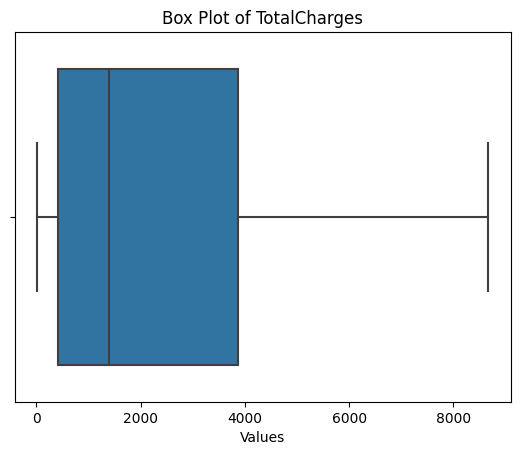

In [32]:
# Plot a box plot to visualize the distribution and skewness in 'TotalCharges' column

sns.boxplot(x=df['TotalCharges'])
plt.xlabel('Values')
plt.title('Box Plot of ' + 'TotalCharges')
plt.show()

Since there is skewness in the distribution, we choose to impute with the median which is less sensitive to extreme values.

In [33]:
# Impute missing values with the median

median_TotalCharges=df['TotalCharges'].median()

df['TotalCharges'].fillna(median_TotalCharges, inplace=True)

In [34]:
#check if missing value imputation was successful

df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [35]:
#check missing values hidden in strings in df2

df2[df2['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,


In [36]:
# Convert the object column to float, preserving missing values as NaN

df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')

# Round the values to 2 decimal places
df2['TotalCharges'] = df2['TotalCharges'].round(2)

In [37]:
#check again if there are any missing values in df2
#check if column was successfully converted to float

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [38]:
#count missing values in df2
#3 missing values detected in df2

df2['TotalCharges'].isnull().sum()

3

In [39]:
df2['TotalCharges'].describe()


count    1997.000000
mean     2235.995093
std      2259.794309
min        18.900000
25%       353.650000
50%      1388.450000
75%      3632.000000
max      8684.800000
Name: TotalCharges, dtype: float64

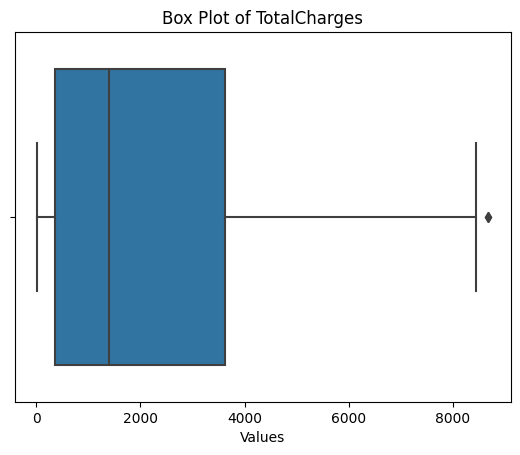

In [40]:
# Plot a box plot to visualize the distribution and skewness in 'TotalCharges' column

sns.boxplot(x=df2['TotalCharges'])
plt.xlabel('Values')
plt.title('Box Plot of ' + 'TotalCharges')
plt.show()

df2['TotalCharges'] column is skewed and has an outlier. Hence we impute missing values with median

In [41]:
# Impute missing values with the median

median_TotalCharges_2=df2['TotalCharges'].median()

df2['TotalCharges'].fillna(median_TotalCharges_2, inplace=True)

In [42]:
#confirm if missing values have been removed

df2['TotalCharges'].isnull().sum()

0

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     4773 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    4391 non-null   object 
 10  OnlineBackup      4391 non-null   object 
 11  DeviceProtection  4391 non-null   object 
 12  TechSupport       4391 non-null   object 
 13  StreamingTV       4391 non-null   object 
 14  StreamingMovies   4391 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 
 17  